In [1]:
import os

import os

PROJECT_ROOT_PATH = os.getcwd()
DATA_PATH = os.path.join(PROJECT_ROOT_PATH, "data")
ZIP_PATH = os.path.join(PROJECT_ROOT_PATH, "house-prices-advanced-regression-techniques.zip")

In [2]:
if not os.path.exists(DATA_PATH):
    import zipfile
    zipped_data = zipfile.ZipFile(ZIP_PATH)
    zipped_data.extractall(DATA_PATH)
    zipped_data.close()

In [3]:
os.listdir(DATA_PATH)

['test.csv', 'train.csv']

In [4]:
if os.path.exists(os.path.join(DATA_PATH, "sample_submission.csv")):
    import shutil
    shutil.move(os.path.join(DATA_PATH, "sample_submission.csv"),
                os.path.join(PROJECT_ROOT_PATH, "sample_submission.csv"))
    shutil.move(os.path.join(DATA_PATH, "data_description.txt"),
                os.path.join(PROJECT_ROOT_PATH, "data_description.txt"))

In [5]:
os.listdir(DATA_PATH)

['test.csv', 'train.csv']

In [6]:
TRAIN_PATH = os.path.join(DATA_PATH, "train.csv")
TEST_PATH = os.path.join(DATA_PATH, "test.csv")

In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = pd.read_csv(TRAIN_PATH)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
data.set_index("Id", inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
with open(os.path.join(PROJECT_ROOT_PATH, "data_description.txt")) as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
data.corr()["SalePrice"]

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [14]:
numeric_features_with_nan = data.select_dtypes(exclude="object").columns[data.select_dtypes(exclude="object").isnull().any()]

In [15]:
data[numeric_features_with_nan].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

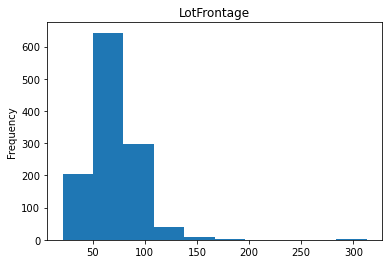

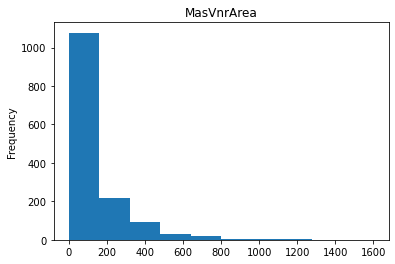

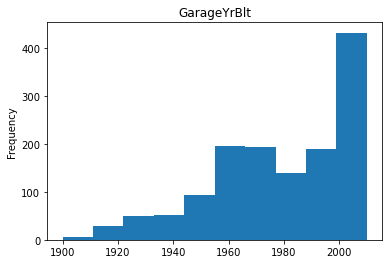

In [16]:
for feature in numeric_features_with_nan:
    plt.figure()
    plt.title(feature)
    data[feature].plot.hist()
    plt.show()

In [17]:
categoric_features_with_nan = data.columns[data.isnull().any()][~np.isin(data.columns[data.isnull().any()], numeric_features_with_nan)]

In [18]:
categoric_features_with_nan

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [19]:
data[categoric_features_with_nan].isnull().mean()

Alley           0.937671
MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [20]:
features_with_meaningful_nan = []
with open(os.path.join(PROJECT_ROOT_PATH, "data_description.txt")) as f:
    feature_name = None
    for line in (line.strip().strip("\n").strip("\t") for line in f.readlines()):
        if ":" in line and line[:line.find(":")]:
            feature_name = line[:line.find(":")]
        if feature_name in data.select_dtypes(include=object).columns and line.startswith("NA"):
            features_with_meaningful_nan.append(feature_name)

print(features_with_meaningful_nan)

['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [21]:
features_with_nonmeaningful_nan = list(set(categoric_features_with_nan) - set(features_with_meaningful_nan))
print(features_with_nonmeaningful_nan)

['MasVnrType', 'Electrical']


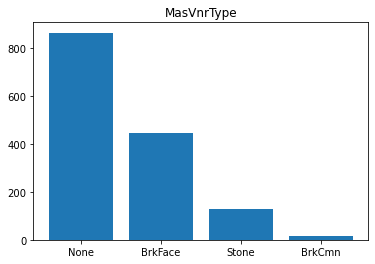

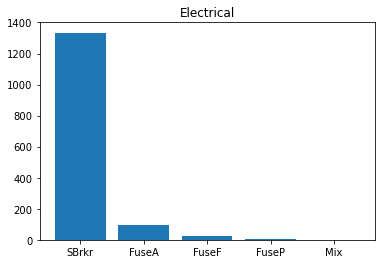

In [22]:
for feature in features_with_nonmeaningful_nan:
    plt.figure()
    plt.title(feature)
    height = data[feature].value_counts()
    x = height.index
    plt.bar(x, height)
    plt.show()

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

class NumericImputer(BaseEstimator, TransformerMixin):
    def __init__(self, estimator=ExtraTreesRegressor(), 
                 max_iter=10, initial_strategy="median",
                 add_indicator=True, skip_complete=True):
        self.estimator = estimator
        self.max_iter = max_iter
        self.initial_strategy = initial_strategy
        self.add_indicator = add_indicator
        self.skip_complete = skip_complete
        self.imputer = IterativeImputer(
            estimator=self.estimator,
            max_iter=self.max_iter,
            initial_strategy=self.initial_strategy,
            add_indicator=self.add_indicator,
            skip_complete=self.skip_complete
        )
    
    def fit(self, X, y=None):
        self.imputer.fit(X)
        self.column_names = self._get_column_names(X)
        return self
    
    def transform(self, X):
        imputed = self.imputer.transform(X)
        return pd.DataFrame(data=imputed, columns=self.column_names)
    
    def _get_column_names(self, X):
        missing_indicators = [str(col) + "_missing" for col in X.columns[X.isnull().any()]]
        return X.columns.tolist() + missing_indicators

In [24]:
class CategoricImputer(BaseEstimator, TransformerMixin):
    def __init__(self, impute_dict):
        self.impute_dict = impute_dict
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X.fillna(self.impute_dict, inplace=True)
        return X

In [25]:
from sklearn.preprocessing import OneHotEncoder

class OneHot(BaseEstimator, TransformerMixin):
    def __init__(self, *, categoric_columns=None, categories=None, drop="first"):
        self.drop = drop
        self.categoric_columns = categoric_columns
        self.categories = categories
        self.encoder = OneHotEncoder(categories=self.categories, 
                                     drop=self.drop, sparse=False)
    
    def fit(self, X, y=None):
        if self.categoric_columns is None:
            self.categoric_columns = X.select_dtypes(include="object").columns
        if self.categories is None:
            self.categories = self._get_categories(X)
        return self
    
    def transform(self, X):
        categoric_data = X[self.categoric_columns]
        encoded_categoric_data = self.encoder.fit_transform(categoric_data)
        numeric_columns = X.columns[~np.isin(X.columns, self.categoric_columns)]
        encoded_X = np.c_[X[numeric_columns], encoded_categoric_data]
        encoded_X_columns = list(numeric_columns) + list(self.encoder.get_feature_names_out())
        return pd.DataFrame(data=encoded_X, columns=encoded_X_columns)
    
    def _get_categories(self, X):
        return [
            X[column].unique()
            for column in self.categoric_columns
        ]

In [26]:
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"].copy()

In [27]:
categoric_impute_dict = {
    feature: "missing" if feature in features_with_meaningful_nan else data[feature].mode()[0]
    for feature in data.select_dtypes(include=object).columns
}

In [28]:
categoric_impute_dict

{'MSZoning': 'RL',
 'Street': 'Pave',
 'Alley': 'missing',
 'LotShape': 'Reg',
 'LandContour': 'Lvl',
 'Utilities': 'AllPub',
 'LotConfig': 'Inside',
 'LandSlope': 'Gtl',
 'Neighborhood': 'NAmes',
 'Condition1': 'Norm',
 'Condition2': 'Norm',
 'BldgType': '1Fam',
 'HouseStyle': '1Story',
 'RoofStyle': 'Gable',
 'RoofMatl': 'CompShg',
 'Exterior1st': 'VinylSd',
 'Exterior2nd': 'VinylSd',
 'MasVnrType': 'None',
 'ExterQual': 'TA',
 'ExterCond': 'TA',
 'Foundation': 'PConc',
 'BsmtQual': 'missing',
 'BsmtCond': 'missing',
 'BsmtExposure': 'missing',
 'BsmtFinType1': 'missing',
 'BsmtFinType2': 'missing',
 'Heating': 'GasA',
 'HeatingQC': 'Ex',
 'CentralAir': 'Y',
 'Electrical': 'SBrkr',
 'KitchenQual': 'TA',
 'Functional': 'Typ',
 'FireplaceQu': 'missing',
 'GarageType': 'missing',
 'GarageFinish': 'missing',
 'GarageQual': 'missing',
 'GarageCond': 'missing',
 'PavedDrive': 'Y',
 'PoolQC': 'missing',
 'Fence': 'missing',
 'MiscFeature': 'missing',
 'SaleType': 'WD',
 'SaleCondition': 'No

In [29]:
categoric_columns = X.select_dtypes(include="object").columns

def get_categories(X, categoric_columns=categoric_columns):
    X = X.copy()
    X = CategoricImputer(categoric_impute_dict).fit_transform(X)
    return [
        X[column].unique()
        for column in categoric_columns
    ]

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

preprocessing_pipeline = Pipeline(
    [
        ("cat_imputer", CategoricImputer(categoric_impute_dict)),
        ("encoder", OneHot(categories=get_categories(X))),
        ("num_imputer", NumericImputer())
    ]
)

In [31]:
X_train = preprocessing_pipeline.fit_transform(X.copy())
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Con,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,LotFrontage_missing,MasVnrArea_missing,GarageYrBlt_missing
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


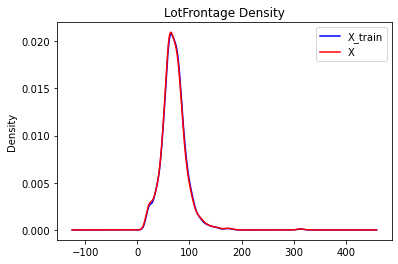

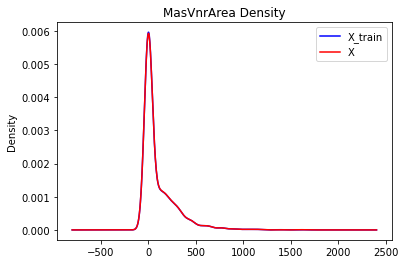

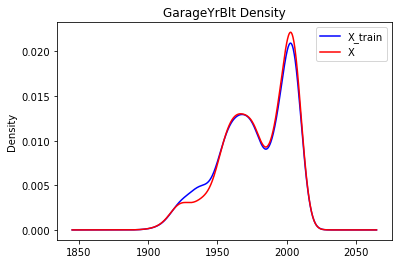

In [32]:
for feature in numeric_features_with_nan:
    plt.figure()
    X_train[feature].plot(kind="kde", color="blue", label="X_train")
    X[feature].plot(kind="kde", color="red", label="X")
    plt.title(feature + " Density")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

In [33]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [34]:
def score_model(clf, X=X_train, y=y, scoring="neg_root_mean_squared_error"):
    scores = cross_val_score(clf, X, y, scoring=scoring)
    mean_score = scores.mean()
    return mean_score if mean_score >= 0 else -mean_score

In [35]:
score_model(XGBRegressor(use_label_encoder=False))

28980.5555217678

In [36]:
final_pipeline = Pipeline(
    [
        ("preprocessing", preprocessing_pipeline),
        ("regressor", XGBRegressor(verbosity=0, use_label_encoder=False))
    ]
)

In [37]:
from scipy import stats

param_grid = {
    "preprocessing__num_imputer__add_indicator": [True, False],
    "regressor__n_estimators": [8, 11, 14, 20],
    "regressor__learning_rate": stats.reciprocal(0.3, 2),
    "regressor__max_depth": [3, 6, 7, 9],
    "regressor__lambda": stats.reciprocal(0.5, 5)
}

In [38]:
from sklearn.model_selection import RandomizedSearchCV

rnd_search = RandomizedSearchCV(
    estimator=final_pipeline,
    param_distributions=param_grid,
    n_iter=100,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    cv=5,
    return_train_score=True,
    error_score="raise"
)

rnd_search.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('preprocessing',
                                              Pipeline(steps=[('cat_imputer',
                                                               CategoricImputer(impute_dict={'Alley': 'missing',
                                                                                             'BldgType': '1Fam',
                                                                                             'BsmtCond': 'missing',
                                                                                             'BsmtExposure': 'missing',
                                                                                             'BsmtFinType1': 'missing',
                                                                                             'BsmtFinType2': 'missing',
                                                                                             'BsmtQual': 'missi

In [39]:
rnd_search.best_score_

-28800.615739214427

In [40]:
rnd_search.best_params_

{'preprocessing__num_imputer__add_indicator': True,
 'regressor__lambda': 0.9524795474036126,
 'regressor__learning_rate': 0.31064174509606274,
 'regressor__max_depth': 9,
 'regressor__n_estimators': 20}

In [41]:
X_test = pd.read_csv(TEST_PATH)
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [42]:
ids = X_test["Id"]

In [43]:
X_test.set_index("Id", inplace=True)

In [44]:
predictions = rnd_search.predict(X_test)

In [45]:
submission_column_1 = pd.DataFrame(ids, columns=['Id'])
submission_column_2 = pd.DataFrame(predictions, columns=['SalePrice'])

submission = pd.concat([submission_column_1, submission_column_2], axis=1)
submission.head()

,Id,SalePrice
0,1461,133780.562500
1,1462,148688.796875
2,1463,178182.140625
3,1464,196673.640625
4,1465,189495.531250


In [46]:
SUBMISSION_PATH = os.path.join(PROJECT_ROOT_PATH, "submission.csv")
submission.to_csv(SUBMISSION_PATH, index=False)